In [1]:
% matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import h5py

In [2]:
fileName = 'cache/H-H1_LOSC_4_V1-931049472-4096.hdf5'
dataFile = h5py.File(fileName, 'r')

In [3]:
for key in dataFile.keys():
    print key

meta
quality
strain


In [4]:
strain = dataFile['strain']['Strain'].value
ts = dataFile['strain']['Strain'].attrs['Xspacing']

In [6]:
strain = strain[np.logical_not(np.isnan(strain))]

In [7]:
metaKeys = dataFile['meta'].keys()
meta = dataFile['meta']
for key in metaKeys:
    print key, meta[key].value

Description Strain data time series from LIGO
DescriptionURL http://losc.ligo.org/
Detector H1
Duration 4096
GPSstart 931049472
Observatory H
Type StrainTimeSeries
UTCstart 2009-07-08T00:50:57


In [8]:
gpsStart = meta['GPSstart'].value
duration = meta['Duration'].value
gpsEnd = gpsStart + duration

time = np.arange(gpsStart, gpsEnd, ts)

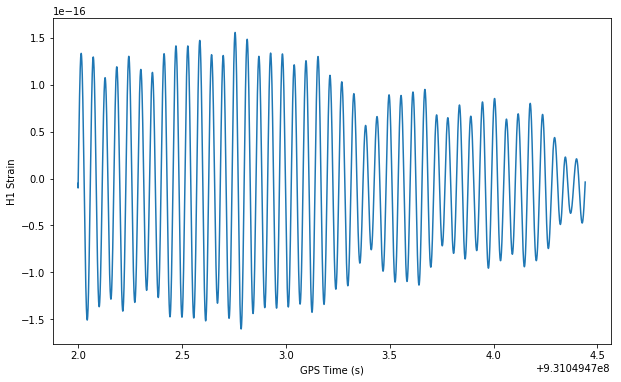

In [9]:
fig1 = plt.figure(figsize=(10, 6))
numSamples = 10000
plt.plot(time[0:numSamples], strain[0:numSamples])
plt.xlabel('GPS Time (s)')
plt.ylabel('H1 Strain')

In [10]:
dqInfo = dataFile['quality']['simple']
bitnameList = dqInfo['DQShortnames'].value
nbits = len(bitnameList)

for bit in range(nbits):
    print bit, bitnameList[bit]

0 DATA
1 CBCHIGH_CAT1
2 CBCHIGH_CAT2
3 CBCHIGH_CAT3
4 CBCHIGH_CAT4
5 CBCLOW_CAT1
6 CBCLOW_CAT2
7 CBCLOW_CAT3
8 CBCLOW_CAT4
9 BURST_CAT1
10 BURST_CAT2
11 BURST_CAT3
12 BURST_CAT4
13 BURST_CAT3H
14 BURST_CAT4H
15 CW_CAT1
16 STOCH_CAT1


In [11]:
qmask = dqInfo['DQmask'].value

In [15]:
sci = (qmask >> 0) & 1
burst1 = (qmask >> 9) & 1

In [17]:
goodData_1hz = sci & burst1

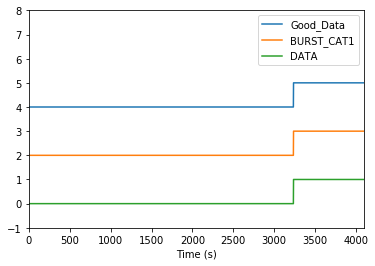

In [18]:
plt.plot(goodData_1hz + 4, label='Good_Data')
plt.plot(burst1 + 2, label='BURST_CAT1')
plt.plot(sci, label='DATA')
plt.axis([0, 4096, -1, 8])
plt.legend(loc=1)
plt.xlabel('Time (s)')

In [20]:
dummy = np.zeros(goodData_1hz.shape)
masked_dummy = np.ma.masked_array(dummy, np.logical_not(goodData_1hz))
segments = np.ma.flatnotmasked_contiguous(masked_dummy)
segList = [(int(seg.start+gpsStart), int(seg.stop+gpsStart)) for seg in segments]

In [21]:
print(segList)

[(931052708, 931053568)]
